# Semana 1: Exploración del problema y del dataset

## 1. Cargar y visualizar señales ECG

#1.1- Introducción:
En esta primera entrega, exploraremos un subconjunto de datos derivados de señales ECG (intervalos RR). El objetivo es familiarizarnos con las variables estadísticas (mean_rr, std_rr, skew_rr, kurt_rr) y analizar cómo se relacionan con el diagnóstico de ritmos normales vs. fibrilación auricular (AFib).

In [14]:
#======================================
# Cargar el dataset
#======================================
import os
if not os.path.exists('Proyecto-MachineLearning'):
    !git clone https://github.com/BorisMejiasII/Proyecto-MachineLearning.git

%cd Proyecto-MachineLearning

import pandas as pd
rr_df = pd.read_csv('ecg_rr_features_curado.csv')

# 4. Vista previa
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(rr_df)


Cloning into 'Proyecto-MachineLearning'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
Receiving objects: 100% (15/15), 6.79 KiB | 6.79 MiB/s, done.
remote: Total 15 (delta 3), reused 8 (delta 0), pack-reused 0 (from 0)
Resolving deltas: 100% (3/3), done.
/content/Proyecto-MachineLearning/Proyecto-MachineLearning/Proyecto-MachineLearning/Proyecto-MachineLearning
       mean_rr     std_rr   skew_rr   kurt_rr   label
0   849.671415  37.965868  0.404165  3.097078  Normal
1   786.173570  87.045564  0.462868  3.968645    AFib
2   864.768854  49.730056  0.278733  2.297947  Normal
3   952.302986  28.845781  0.260759  2.672338    AFib
4   776.584663  66.450898  0.662505  2.607892    AFib
5   776.586304  25.583127  0.771248  1.536485  Normal
6   957.921282  54.177272  0.485598  3.296120  Normal
7   876.743473  10.806598  0.700707  3.261055    AFib
8   753.052561  23.436279  0.572327  3.005113  Normal
9   8

## 2. Resumen del artículo base (Clifford et al., 2017)

El artículo base presenta el PhysioNet/Computing in Cardiology Challenge 2017, centrado en la clasificación automática de señales ECG para la detección de fibrilación auricular (AFib). Se describe un conjunto de datos compuesto por señales de corta duración, extraídas de diferentes pacientes, junto con etiquetas clínicas (Normal, AFib, Otros).

El enfoque del artículo sugiere el uso de características simples como los intervalos RR (tiempo entre latidos), los cuales permiten una separación razonable entre ritmos normales y arrítmicos, incluso sin acceder a la señal cruda de ECG. El trabajo sirve como base para tareas de extracción de características, clasificación automática y validación de modelos diagnósticos.


## 3. Análisis del dataset (cantidad de señales, duración, etiquetas, etc.)

In [15]:
#=====================================
# 3. Análisis del dataset
#=====================================

# Cantidad total de muestras
print("🔢 Total de registros:", len(rr_df))

# Conteo por etiqueta
print("\n📊 Distribución de clases:")
print(rr_df['label'].value_counts())

# Estadísticas por clase
print("\n📈 Estadísticas por clase:")
print(rr_df.groupby('label').describe())


🔢 Total de registros: 30

📊 Distribución de clases:
label
Normal    18
AFib      12
Name: count, dtype: int64

📈 Estadísticas por clase:
       mean_rr                                                                                    std_rr                                                                              skew_rr                                                                       kurt_rr                                                                      
         count        mean        std         min         25%         50%         75%         max  count       mean        std        min        25%        50%        75%        max   count      mean       std       min       25%       50%       75%       max   count      mean       std       min       25%       50%       75%       max
label                                                                                                                                                                                      

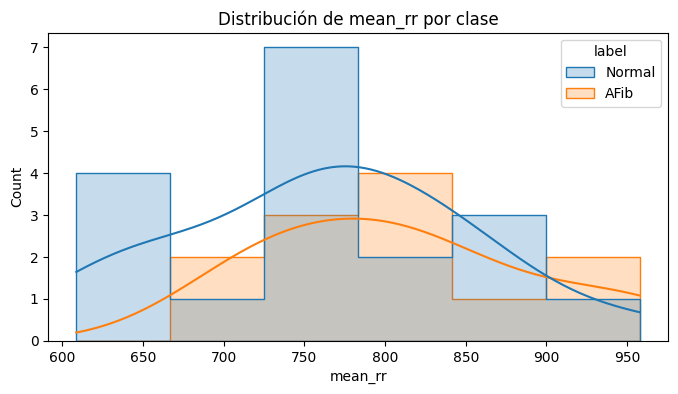

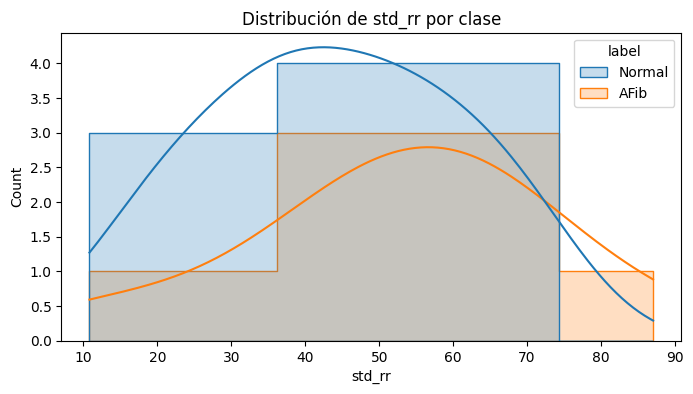

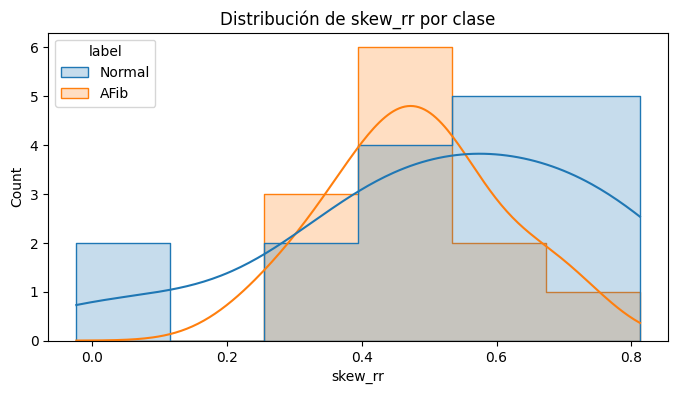

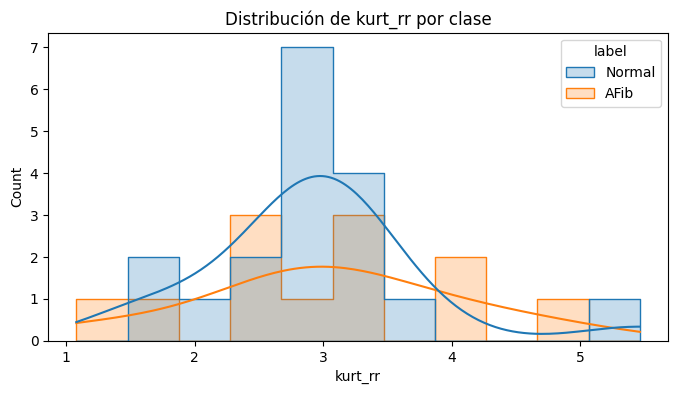

In [17]:
#===============================================
# 4. Visualización de distribuciones por clase
#===============================================
import seaborn as sns
import matplotlib.pyplot as plt

# Variables a graficar
features = ['mean_rr', 'std_rr', 'skew_rr', 'kurt_rr']

# Histograma con KDE por clase
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=rr_df, x=feature, hue='label', kde=True, element='step')
    plt.title(f'Distribución de {feature} por clase')
    plt.show()


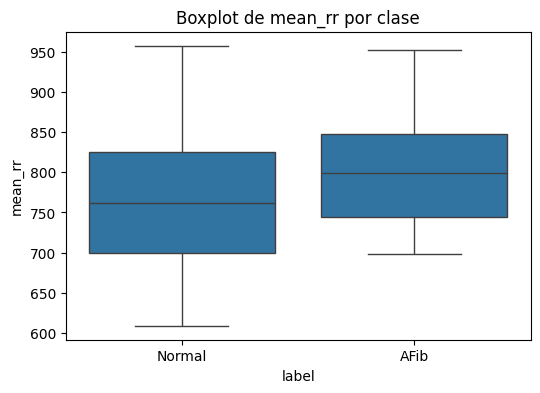

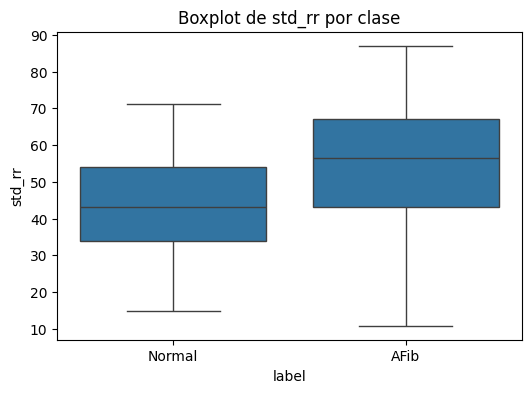

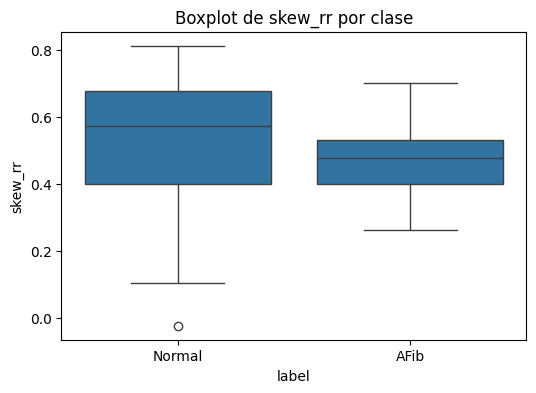

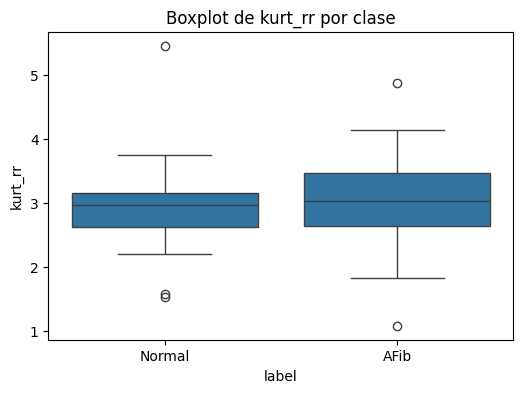

In [18]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=rr_df, x='label', y=feature)
    plt.title(f'Boxplot de {feature} por clase')
    plt.show()


## Conclusión

- Las variables `std_rr` y `kurt_rr` parecen mostrar diferencias más marcadas entre ritmos normales y AFib.
- La distribución de `mean_rr` también varía entre clases, aunque con cierto solapamiento.
- El dataset, aunque pequeño, permite observar patrones interesantes mediante análisis estadístico básico.
- Esto sugiere que modelos simples de machine learning podrían utilizar estas características para hacer predicciones razonables.
